In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets

In [25]:
pd.options.display.float_format = '{:,.6f}'.format

# Lectura de datos

In [3]:
iris_file = datasets.load_iris()

In [4]:
iris_file

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Descripción del dataset:
* Este conjunto de datos consta de 3 tipos diferentes de iris (setosa, versicolor, virginica), con loas medciones de pétalos y sépalos ( 150 observaciones)
* Las filas o renglones son observaciones de las plantas y las columnas son largo y ancho de los pétalos y sépalos.

# Tramamiento / Limpieza

In [5]:
df_iris = pd.DataFrame( data = np.c_[ iris_file['data'] , iris_file['target'] ] , 
                        columns = iris_file['feature_names'] + ['tipo_iris'] )

In [6]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo_iris
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
cols = df_iris.columns.tolist()

In [8]:
cols = [c for c in cols if c not in ['tipo_iris']]

In [15]:
df_iris[cols].describe(percentiles= np.arange(0,1.01,.1) )

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
0%,4.300000,2.000000,1.000000,0.100000
10%,4.800000,2.500000,1.400000,0.200000
20%,5.000000,2.700000,1.500000,0.200000
30%,5.270000,2.800000,1.700000,0.400000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000


# Estandarización

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # para estandarizar datos
from sklearn.decomposition import PCA

In [17]:
ss = StandardScaler()  ## mm = MinMaxScaler()

In [19]:
df_iris[['ss_'+ c for c in cols]] = ss.fit_transform( df_iris[cols] )

In [20]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo_iris,ss_sepal length (cm),ss_sepal width (cm),ss_petal length (cm),ss_petal width (cm)
0,5.1,3.5,1.4,0.2,0.0,-0.900681,1.019004,-1.340227,-1.315444
1,4.9,3.0,1.4,0.2,0.0,-1.143017,-0.131979,-1.340227,-1.315444
2,4.7,3.2,1.3,0.2,0.0,-1.385353,0.328414,-1.397064,-1.315444
3,4.6,3.1,1.5,0.2,0.0,-1.506521,0.098217,-1.283389,-1.315444
4,5.0,3.6,1.4,0.2,0.0,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,1.038005,-0.131979,0.819596,1.448832
146,6.3,2.5,5.0,1.9,2.0,0.553333,-1.282963,0.705921,0.922303
147,6.5,3.0,5.2,2.0,2.0,0.795669,-0.131979,0.819596,1.053935
148,6.2,3.4,5.4,2.3,2.0,0.432165,0.788808,0.933271,1.448832


In [21]:
cols_ss = df_iris.filter(like='ss_').columns.tolist()

In [26]:
df_iris[cols_ss].describe(percentiles= np.arange(0,1.01,.1) )

,ss_sepal length (cm),ss_sepal width (cm),ss_petal length (cm),ss_petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000
std,1.003350,1.003350,1.003350,1.003350
min,-1.870024,-2.433947,-1.567576,-1.447076
0%,-1.870024,-2.433947,-1.567576,-1.447076
10%,-1.264185,-1.282963,-1.340227,-1.315444
20%,-1.021849,-0.822570,-1.283389,-1.315444
30%,-0.694696,-0.592373,-1.169714,-1.052180
40%,-0.294842,-0.131979,0.080709,-0.051775
50%,-0.052506,-0.131979,0.336478,0.132510


# Reducción de Dimensiones - PCA

In [28]:
cols_ss

['ss_sepal length (cm)',
 'ss_sepal width (cm)',
 'ss_petal length (cm)',
 'ss_petal width (cm)']

### Componentes principales: 2

In [30]:
pca = PCA( n_components = 2 )

In [31]:
array_pca = pca.fit_transform( df_iris[cols_ss] )

In [43]:
df_pca = pd.DataFrame({'PCA1' : array_pca[:,0] , 
                       'PCA2' : array_pca[:,1] ,
                       'tipo_iris': df_iris['tipo_iris']} )

In [44]:
df_pca # Esto podría ser ya mi TAD, mi matriz de predictoras y mi variable objetivo

,PCA1,PCA2,tipo_iris
0,-2.264703,0.480027,0.000000
1,-2.080961,-0.674134,0.000000
2,-2.364229,-0.341908,0.000000
3,-2.299384,-0.597395,0.000000
4,-2.389842,0.646835,0.000000
...,...,...,...
145,1.870503,0.386966,2.000000
146,1.564580,-0.896687,2.000000
147,1.521170,0.269069,2.000000
148,1.372788,1.011254,2.000000


In [45]:
# varianza explicada por componente
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [46]:
# varianza explicada total
pca.explained_variance_ratio_.sum()

np.float64(0.9581320720000164)

In [52]:
# varianza explicada por variable por componente 
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

#### Graficas Simples

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

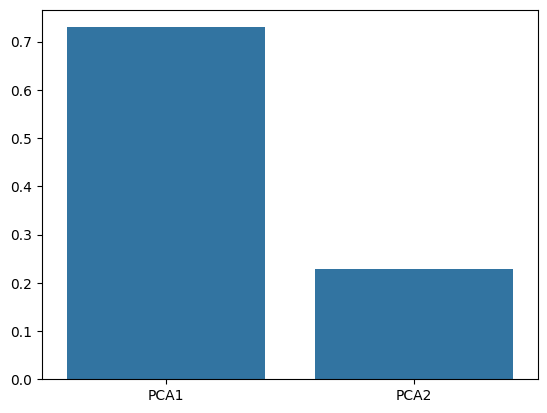

In [48]:
sns.barplot( x = ['PCA1','PCA2'], y = pca.explained_variance_ratio_ )

<Axes: xlabel='PCA1', ylabel='PCA2'>

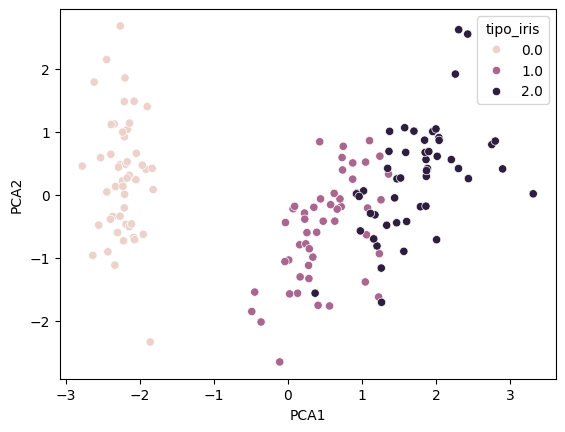

In [49]:
sns.scatterplot(
    x = 'PCA1',
    y = 'PCA2',
    hue= 'tipo_iris',
    data = df_pca
)

## Componentes principales: 3

In [53]:
pca_3 = PCA( n_components = 3 )

In [58]:
array_pca_3 = pca_3.fit_transform( df_iris[cols_ss] )

In [60]:
df_pca_3 = pd.DataFrame({'PCA1' : array_pca_3[:,0] , 
                       'PCA2' : array_pca_3[:,1] , 
                       'PCA3' : array_pca_3[:,2] ,
                       'tipo_iris': df_iris['tipo_iris']} )

In [61]:
df_pca_3

,PCA1,PCA2,PCA3,tipo_iris
0,-2.264703,0.480027,0.127706,0.000000
1,-2.080961,-0.674134,0.234609,0.000000
2,-2.364229,-0.341908,-0.044201,0.000000
3,-2.299384,-0.597395,-0.091290,0.000000
4,-2.389842,0.646835,-0.015738,0.000000
...,...,...,...,...
145,1.870503,0.386966,-0.256274,2.000000
146,1.564580,-0.896687,0.026371,2.000000
147,1.521170,0.269069,-0.180178,2.000000
148,1.372788,1.011254,-0.933395,2.000000


In [62]:
# varianza explicada por componente
pca_3.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [63]:
# varianza explicada total
pca_3.explained_variance_ratio_.sum()

np.float64(0.9948212908928451)

In [64]:
# varianza explicada por variable por componente 
pca_3.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274]])

### Gráficas simples

<Axes: >

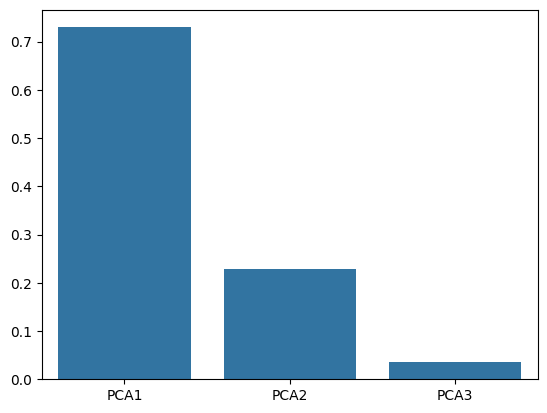

In [65]:
sns.barplot( x = ['PCA1','PCA2','PCA3'], y = pca_3.explained_variance_ratio_ )

In [70]:
df_pca_3['tipo_iris'] = df_pca_3['tipo_iris'].astype('int32')

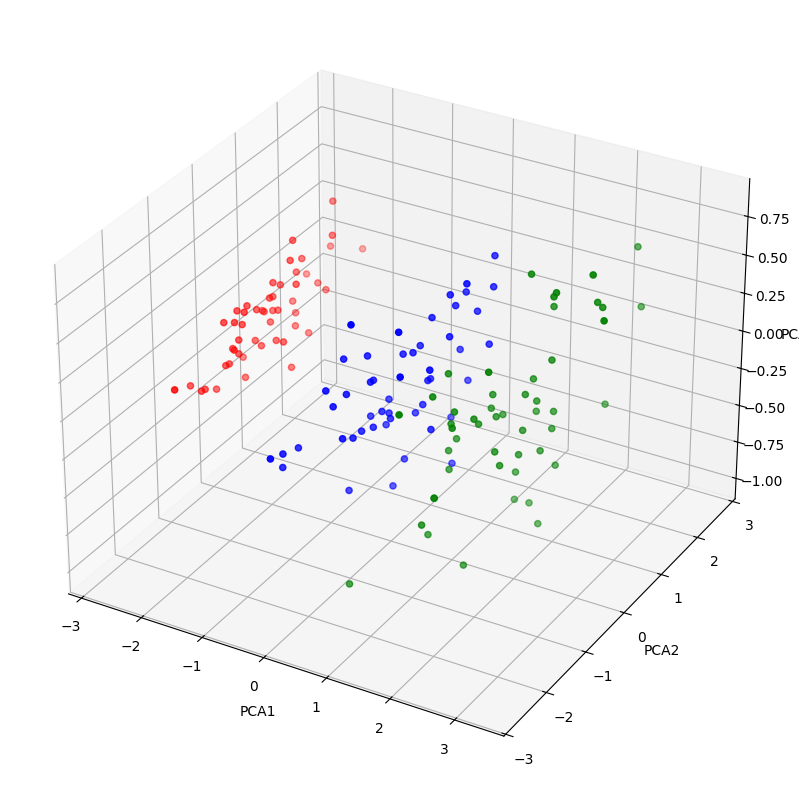

In [72]:
fig = plt.figure( figsize=(10,15) )

ax = fig.add_subplot( 111 , projection='3d')

x = df_pca_3['PCA1']
y = df_pca_3['PCA2']
z = df_pca_3['PCA3']

clase = df_pca_3['tipo_iris'].map( { 0:'r' , 1:'b' , 2:'g' } )

ax.scatter( x,y,z,  c = clase, marker = 'o' )

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

# Lectura de datos de Cancer

In [73]:
datasets.load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0